# Treating the categorical variable as Nominal Values 

Importing the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("car_data.csv")

In [2]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df['persons'].unique()
df['persons'] = df['persons'].map({'2':2, '4':4, 'more':5})

df['doors'].unique()
df['doors'] = df['doors'].map({'2':2, '3':3, '4':4, '5more':5})

Label Encoding for target variable 

In [4]:
from sklearn import linear_model, metrics, preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.target)
df.target = le.transform(df.target)

In [5]:
X = df.iloc[:,list(range(0,len(df.columns)-1))]
y = df.iloc[:, 6]

In [6]:
# checking features and separating the categorical variables 
cat = X.select_dtypes(include='O').keys()
cat

Index(['buying', 'maint', 'lug_boot', 'safety'], dtype='object')

In [7]:
# creating new df
# setting columns we use
new_df = pd.read_csv("car_data.csv",usecols=['buying', 'maint', 'lug_boot', 'safety']) 
new_df.head()

,buying,maint,lug_boot,safety
0,vhigh,vhigh,small,low
1,vhigh,vhigh,small,med
2,vhigh,vhigh,small,high
3,vhigh,vhigh,med,low
4,vhigh,vhigh,med,med


In [8]:
col_dummies = pd.get_dummies(df[['buying', 'maint', 'lug_boot', 'safety']])

In [9]:
df = pd.concat([df, col_dummies], axis=1)

In [10]:
df = df.drop(['buying', 'maint', 'lug_boot', 'safety'], axis = 1)
df

,doors,persons,target,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,2,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,2,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,2,0,0,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,5,5,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1724,5,5,3,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1725,5,5,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1726,5,5,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [11]:
X = df.drop(['target'], axis=1)
y = df['target']

In [12]:
X.head()

,doors,persons,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,0,0,0,1,0,0,0,1,0,1,0,0,0,1


In [13]:
y.head()
y.unique()

array([2, 0, 3, 1])

In [14]:
df.isnull().sum()

doors             0
persons           0
target            0
buying_high       0
buying_low        0
buying_med        0
buying_vhigh      0
maint_high        0
maint_low         0
maint_med         0
maint_vhigh       0
lug_boot_big      0
lug_boot_med      0
lug_boot_small    0
safety_high       0
safety_low        0
safety_med        0
dtype: int64

In [15]:
df.describe()

,doors,persons,target,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,3.500000,3.666667,1.553241,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,1.118358,1.247580,0.875948,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.250000,5.000000,2.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   doors           1728 non-null   int64
 1   persons         1728 non-null   int64
 2   target          1728 non-null   int32
 3   buying_high     1728 non-null   uint8
 4   buying_low      1728 non-null   uint8
 5   buying_med      1728 non-null   uint8
 6   buying_vhigh    1728 non-null   uint8
 7   maint_high      1728 non-null   uint8
 8   maint_low       1728 non-null   uint8
 9   maint_med       1728 non-null   uint8
 10  maint_vhigh     1728 non-null   uint8
 11  lug_boot_big    1728 non-null   uint8
 12  lug_boot_med    1728 non-null   uint8
 13  lug_boot_small  1728 non-null   uint8
 14  safety_high     1728 non-null   uint8
 15  safety_low      1728 non-null   uint8
 16  safety_med      1728 non-null   uint8
dtypes: int32(1), int64(2), uint8(14)
memory usage: 57.5 KB


In [17]:
## Checking the distribution of target value classes in the dataset 

y.value_counts()


2    1210
0     384
1      69
3      65
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind = 'bar')
plt.show()

It can be seen that this is a class imbalanced dataset, hence oversampling needs to be done to take care of this. 

Class=2, n=1210 (70.023%)
Class=0, n=384 (22.222%)
Class=3, n=65 (3.762%)
Class=1, n=69 (3.993%)


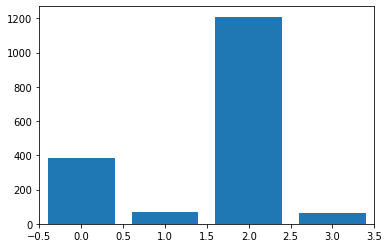

In [19]:
# split into input and output elements
import collections
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, metrics, preprocessing
from collections import Counter 
import matplotlib.pyplot as plt
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.xlim(-0.5, 3.5)
plt.show()

### Splitting the data into train and test split 

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
pd.DataFrame(X_train).head()

,doors,persons,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
107,5,5,0,0,0,1,0,0,0,1,1,0,0,1,0,0
901,3,4,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1709,5,2,0,1,0,0,0,1,0,0,1,0,0,1,0,0
706,4,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1
678,3,2,1,0,0,0,0,0,1,0,0,1,0,0,1,0


### SMOTE Technique to Oversample the Minority Class

In [22]:
# transform the dataset
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
from imblearn.over_sampling import SMOTEN
strategy = {0:1200, 1:1200, 2:1200, 3:1200}
oversample = SMOTEN(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [23]:
pd.DataFrame(y_train).value_counts()

0    1200
1    1200
2    1200
3    1200
dtype: int64

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,classification_report, recall_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [25]:
def Average(lst):
    return sum(lst) / len(lst)

## Running Nested Cross Validation for various Model (decision tree, k-NN, logistic regression, NB, SVM)

#### Nested Cross Validation for Decision Tree

In [26]:

import numpy as np
scoring = 'accuracy'
N_TRIALS = 10
nested_scores_dt = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    dt = DecisionTreeClassifier(random_state=42)
    dt_grid = {'max_depth':list(range(0,10)),'min_samples_leaf':[2, 3, 4], 'min_samples_split':[10, 20, 30], 
                 'criterion':['entropy','gini']}   
    dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv, scoring = scoring)   
    dt_score=cross_val_score(dt_clf,X_train,y_train, cv = outer_cv)
    nested_scores_dt[i] = dt_score.mean()     

In [27]:
print("Mean accuracy for training data set with cross validations for decision tree:",nested_scores_dt.mean())

Mean accuracy for training data set with cross validations for decision tree: 0.9810000000000001


#### Nested Cross Validation for KNN Classifier 

In [28]:
import numpy as np
scoring = 'accuracy'
N_TRIALS = 10
nested_scores_knn = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    knn = KNeighborsClassifier()
    knn_grid = {'n_neighbors':list(range(2,8)), 'p':[1,2,3], 'weights':['uniform','distance']}
    knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = inner_cv, scoring = scoring)  
    knn_score=cross_val_score(knn_clf,X_train,y_train, cv = outer_cv)
    nested_scores_knn[i] = knn_score.mean()     

In [39]:
print("Mean accuracy for training data set with cross validations for KNN classifier:",nested_scores_knn.mean())

Mean accuracy for training data set with cross validations for KNN classifier: 0.9878333333333333


#### Nested Cross Validation for Logistic Regression Classifier 

In [30]:
scoring = 'accuracy'
N_TRIALS = 10
nested_scores_log = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    log = LogisticRegression(random_state=42, multi_class = 'multinomial')
    lr_grid = {'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}
    lr_clf = GridSearchCV(estimator = log, param_grid = lr_grid, cv = inner_cv, scoring = scoring)
    lr_score=cross_val_score(lr_clf,X_train,y_train, cv = outer_cv)
    nested_scores_log[i] = lr_score.mean() 

In [31]:
print("Mean accuracy for training data set with 5 cross validations for logistic regression:",nested_scores_log.mean())

Mean accuracy for training data set with 5 cross validations for logistic regression: 0.9441666666666665


#### Nested Cross Validation for SVC Classifier 

In [32]:
scoring = 'accuracy'
N_TRIALS = 10
nested_scores_svc = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    svc = SVC(random_state = 42, probability=True)
    svc_grid = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    svc_clf = GridSearchCV(estimator = svc, param_grid = svc_grid, cv=inner_cv, scoring = scoring)
    svc_score=cross_val_score(svc_clf,X_train,y_train, cv = outer_cv)
    nested_scores_svc[i] = svc_score.mean()

In [33]:
print("Mean accuracy for training data set with cross validations for SVC:",nested_scores_svc.mean())

Mean accuracy for training data set with cross validations for SVC: 0.9966666666666665


#### Nested Cross Validation for Naive Bayes Classifier 

In [35]:
from sklearn.naive_bayes import MultinomialNB
scoring = 'accuracy'
N_TRIALS = 10
nested_scores_nb = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    nb = MultinomialNB()
    nb_grid = {'alpha': [1, 1e-1, 1e-2]}
    nb_clf = GridSearchCV(estimator = nb, param_grid = nb_grid, cv = inner_cv,n_jobs=2)
    nb_score=cross_val_score(nb_clf,X_train,y_train, cv = outer_cv, n_jobs=2)
    nested_scores_nb[i] = nb_score.mean() 

In [36]:
print("Mean accuracy for training data set with cross validations for Naive Bayes:",nested_scores_nb.mean())

Mean accuracy for training data set with cross validations for Naive Bayes: 0.8216666666666667


#### It can be seen that out of the 5 models compared for accuracy, SVM performs the best with an average accuracy of 99.66%

### Best Model Selection on the basis of Recall 

In [59]:
import numpy as np
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_dt_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    dt = DecisionTreeClassifier(random_state=42)
    dt_grid = {'max_depth':list(range(0,10)),'min_samples_leaf':[2, 3, 4], 'min_samples_split':[10, 20, 30], 
                 'criterion':['entropy','gini']}   
    dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv, scoring = scoring)   
    dt_score=cross_val_score(dt_clf,X_train,y_train, cv = outer_cv)
    nested_scores_dt_re[i] = dt_score.mean()     
print("Mean recall for training data set with cross validations for decision tree:",nested_scores_dt_re.mean())

Mean recall for training data set with cross validations for decision tree: 0.9803257787904298


In [61]:
import numpy as np
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_knn_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    knn = KNeighborsClassifier()
    knn_grid = {'n_neighbors':list(range(2,8)), 'p':[1,2,3], 'weights':['uniform','distance']}
    knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = inner_cv, scoring = scoring)  
    knn_score=cross_val_score(knn_clf,X_train,y_train, cv = outer_cv)
    nested_scores_knn_re[i] = knn_score.mean()    
    
print("Mean recall for training data set with cross validations for KNN classifier:",nested_scores_knn_re.mean())

Mean recall for training data set with cross validations for KNN classifier: 0.9880589114741734


In [62]:
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_log_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    log = LogisticRegression(random_state=42, multi_class = 'multinomial')
    lr_grid = {'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}
    lr_clf = GridSearchCV(estimator = log, param_grid = lr_grid, cv = inner_cv, scoring = scoring)
    lr_score=cross_val_score(lr_clf,X_train,y_train, cv = outer_cv)
    nested_scores_log_re[i] = lr_score.mean() 
    
print("Mean recall for training data set with cross validations for Logistic Regression classifier:",nested_scores_log_re.mean())

Mean recall for training data set with cross validations for Logistic Regression classifier: 0.9443447630563601


In [63]:
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_svc_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    svc = SVC(random_state = 42, probability=True)
    svc_grid = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    svc_clf = GridSearchCV(estimator = svc, param_grid = svc_grid, cv=inner_cv, scoring = scoring)
    svc_score=cross_val_score(svc_clf,X_train,y_train, cv = outer_cv)
    nested_scores_svc_re[i] = svc_score.mean()
    
print("Mean recall for training data set with cross validations for SVC classifier:",nested_scores_svc_re.mean())

Mean recall for training data set with cross validations for SVC classifier: 0.9966074965393652


In [64]:
from sklearn.naive_bayes import MultinomialNB
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_nb_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    nb = MultinomialNB()
    nb_grid = {'alpha': [1, 1e-1, 1e-2]}
    nb_clf = GridSearchCV(estimator = nb, param_grid = nb_grid, cv = inner_cv,scoring = scoring)
    nb_score=cross_val_score(nb_clf,X_train,y_train, cv = outer_cv, scoring = scoring)
    nested_scores_nb_re[i] = nb_score.mean() 
    
print("Mean recall for training data set with cross validations for Multinomial NB classifier:",nested_scores_nb_re.mean())

Mean recall for training data set with cross validations for Multinomial NB classifier: 0.8219441046354484


#### When recall is used as a performance evaluation metric, SVM again performs the best out of all 5 models. 

Various Model Performance on Holdout/Testing Data has been summarized in a tabular form for both accuracy and recall as evaluation metric

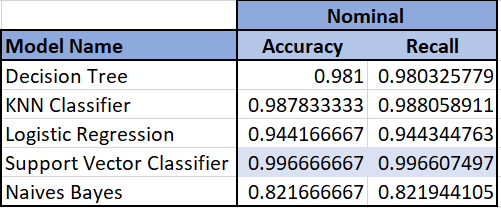


## Hyper Parameter Tuning for SVM Model Using Grid Search CV

In [65]:
parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.985 (+/-0.012) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.988 (+/-0.033) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.991 (+/-0.016) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.033) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.993 (+/-0.021) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.033) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.993 (+/-0.021) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.033) for {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
0.960 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.961 (+/-0.018) for {'C': 10, 'kernel': 'linear'}
0.960 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.959 (+/-0.016) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluatio

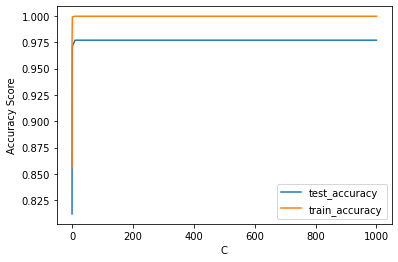

In [68]:
from sklearn.metrics import accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
train_accuracy = []
test_accuracy = []

for i in C:
    clf = SVC(C= i, kernel = 'rbf', gamma = 0.5, random_state=42)
    clf.fit(X_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

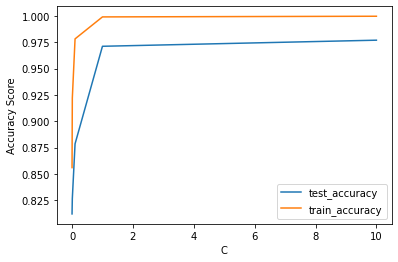

In [69]:
from sklearn.metrics import accuracy_score
C = [0.001, 0.01, 0.1, 1, 10]
train_accuracy = []
test_accuracy = []

for i in C:
    clf = SVC(C= i, kernel = 'rbf', gamma = 0.5, random_state=42)
    clf.fit(X_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

##### It can be seen that beyond C = 1 there is no improvement in the testing/holdout data accuracy, hence to avoid overfitting C = 1 is taken for final model development

In [72]:
clf_nom = SVC(C=1, gamma = 0.1, kernel = 'rbf', random_state = 42, probability=True)
clf_nom.fit(X_train, y_train)
best_train_predictions_new = clf_nom.predict(X_train)
print(classification_report(y_test, clf_nom.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.59      0.91      0.71        11
           2       1.00      1.00      1.00       235
           3       0.89      0.94      0.91        17

    accuracy                           0.97       346
   macro avg       0.87      0.94      0.89       346
weighted avg       0.98      0.97      0.97       346



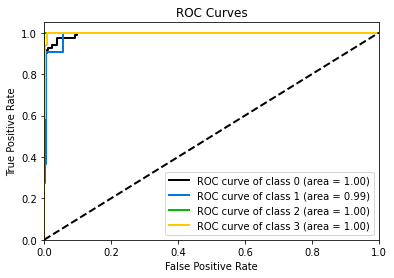

In [74]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, clf_nom.predict_proba(X_test), plot_micro =False, plot_macro = False)
plt.show()

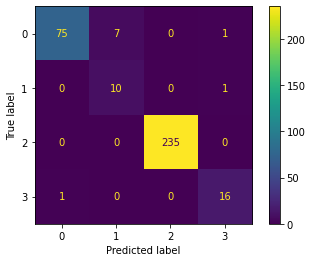

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_nom, X_test, y_test)
plt.show()

In [78]:
from sklearn.metrics import accuracy_score
print("The accuracy score of SVC Classifier on Holdout data is:", accuracy_score(y_test, clf_nom.predict(X_test)))

The accuracy score of SVC Classifier on Holdout data is: 0.9710982658959537


In [79]:
#predicting the data
y_pred_cnb = clf_nom.predict(X_test)
y_prob_pred_cnb = clf_nom.predict_proba(X_test)

#roc auc score
print("The ROC AUC score is: ",roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted'))

The ROC AUC score is:  0.99416308982019


### Conclusion 

When the categorical variables are considered ordinal, SVM performs the best in both the cases, i.e, when accuracy or recall is taken as performance evaluation metric. Best accuracy indicates that the overall model performance on identifying the majority datapoints in respective classes is more compared to other models while best recall is also a strong indicator that there are less false negative cases.

The best model performance on the test/holdout data are summarized below. We can also check the performance for each different classes for precision, recall and f1_score:

                precision    recall  f1-score   support
          -----------------------------------------------
           0       0.99      0.90      0.94        83
           1       0.59      0.91      0.71        11
           2       1.00      1.00      1.00       235
           3       0.89      0.94      0.91        17

#### Overall Model Comparison for various Performance Metrics - Accuracy & Recall on Nested CV outputs

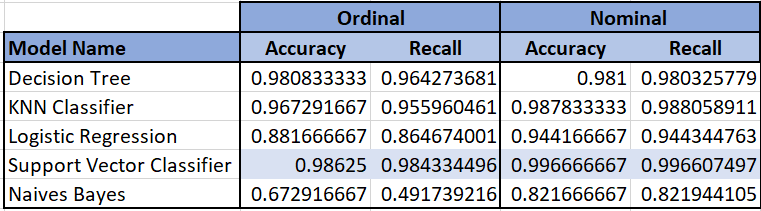

It can be concluded from the table above that:
- If recall is considered as performance evaluation metric, all 5 models performs better when categorical data is 
considered as nominal
- If accuracy is considered as performance evaluation metric, then also all 5 model performs better when 
categorical data is considered as nominal 


##### Overall it is observed that all 5 models under consideration perform better when categorical data is treated as nominal and not ordinal in this case.